# Classify three of animals with CNN
<hr>
This is a project of the ai homework.<br>
Member: D10619106、D10619116、D10619122、D10619134
<hr>

### Environment
- Windows 10
- intel i7-8565U
- Gerfoce MX150
- cuda v10.0.130
- cuDNN v7.2.4
- Python 3.7.5
- tensorflow-gpu 2.0.0

### How to Use?
First you should create a file name predection.py, then type these code:

    import sys
    import numpy as np
    import cv2
    import tensorflow as tf
    model = tf.keras.models.load_model("64x3-CNN.model")
    testing = r"TYPE YOUR PICTURE URL" # example: C:\Users\box88\Desktop\ai\1.jpg
    prediction = model.predict([prepare(testing)])
    maxindex  = np.argmax(prediction)
    print(categories[maxindex])
    
Second you can run this main.py and you will look the answer.

Or you also can use the pred_test.py, the command is:
   
    pred_test.py PICTURE_FILE_PATH
### What is the output?
The output is one of the categories which include Cat,Dog and Squireel.
The model will choose the most rate in the categories.

### Where are the datasets from?
I use the kaggle website.
- Squrrel: https://www.kaggle.com/alessiocorrado99/animals10#OIP--G2ka3pEgJtM8lmuoFogNgHaFj.jpeg
- Cat and Dog:https://www.kaggle.com/tongpython/cat-and-dog

### References
   1. Loading in your own data - Deep Learning basics with Python, TensorFlow and Keras p.2 <br>
   https://pythonprogramming.net/loading-custom-data-deep-learning-python-tensorflow-keras/
   
   2. How to use your trained model - Deep Learning basics with Python, TensorFlow and Keras p.6 <br>
   https://pythonprogramming.net/using-trained-model-deep-learning-python-tensorflow-keras/


In [1]:
import cv2
import os
data_dir = r"C:\Users\box88\Desktop\ai\animal"
categories = ["Cat","Dog","Squirrel"]
td = []

In [3]:
IMG_SIZE = 150
for category in categories:
    cn = categories.index(category)
    path = os.path.join(data_dir,category)
    print(path)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            td.append([new_array,cn])
        except:
            pass
#        break
print(len(td))

C:\Users\box88\Desktop\ai\animal\Cat
C:\Users\box88\Desktop\ai\animal\Dog
C:\Users\box88\Desktop\ai\animal\Squirrel
51754


In [4]:
import random
random.shuffle(td)

In [5]:
import numpy as np
X =[]
Y=[]
for features,label in td:
    X.append(features)
    Y.append(label)
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,3)

In [6]:
import pickle
pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle","wb")
pickle.dump(Y,pickle_out)
pickle_out.close()

(221, 300, 3)


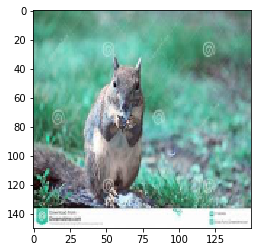

In [7]:
print(img_array.shape)
import matplotlib.pyplot as plt
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import datasets, layers, models
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import numpy
import time

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("Y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0
y = numpy.array(y)
dense_layers = [2]
layer_sizes = [64]
conv_layers = [3]
print(len(X))
print(len(y))


51754
51754


In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 73984)             0         
_________________________________________________________________
dropout (Dropout)            (None, 73984)             0

In [10]:
history = model.fit(X,y,batch_size=32,epochs=10,validation_split=0.3)

Train on 36227 samples, validate on 15527 samples
Epoch 1/10
36227/36227 [==============================] - 237s 7ms/sample - loss: 0.7378 - accuracy: 0.6321 - val_loss: 0.6853 - val_accuracy: 0.6948
Epoch 2/10
36227/36227 [==============================] - 261s 7ms/sample - loss: 0.6151 - accuracy: 0.7260 - val_loss: 0.4874 - val_accuracy: 0.7908
Epoch 3/10
36227/36227 [==============================] - 252s 7ms/sample - loss: 0.5149 - accuracy: 0.7785 - val_loss: 0.4586 - val_accuracy: 0.7990
Epoch 4/10
36227/36227 [==============================] - 254s 7ms/sample - loss: 0.4550 - accuracy: 0.8074 - val_loss: 0.4091 - val_accuracy: 0.8337
Epoch 5/10
36227/36227 [==============================] - 281s 8ms/sample - loss: 0.3961 - accuracy: 0.8323 - val_loss: 0.3926 - val_accuracy: 0.8395
Epoch 6/10
36227/36227 [==============================] - 261s 7ms/sample - loss: 0.3495 - accuracy: 0.8557 - val_loss: 0.4426 - val_accuracy: 0.8369
Epoch 7/10
36227/36227 [==========================

In [11]:
model.save('64x3-CNN.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: 64x3-CNN.model\assets


In [12]:
print(history.history['val_loss'])
print(history.history['loss'])

[0.6853205005284354, 0.4874094379933241, 0.45863824451876417, 0.40908234000182964, 0.3925729569909254, 0.4426051915371388, 0.35401927021763285, 0.3304605903087753, 0.2984722419808359, 0.310637978417388]
[0.7378357282044079, 0.615069492690529, 0.5148851205802173, 0.45504794889609024, 0.39607551705104427, 0.34951134737030143, 0.31248083379091984, 0.28040906658761205, 0.26013583622285247, 0.24493559188995803]


51754/1 - 120s - loss: 0.3593 - accuracy: 0.9399


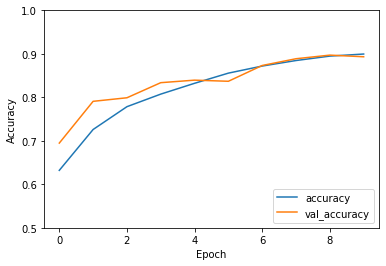

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X,  y, verbose=2)

In [14]:
import cv2
import tensorflow as tf

def prepare(filepath): 
    img_array = cv2.imread(filepath)  
    img_array = img_array/255.0
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE,3) 

In [15]:
#model = tf.keras.models.load_model("64x3-CNN.model")

prediction = model.predict([prepare(r'C:\Users\box88\Desktop\ai\test\1.jpg')])
print(prediction)
print(type(prediction))
maxindex  = np.argmax(prediction)
print(categories[maxindex])

[[9.9995315e-01 3.4657820e-05 1.2188300e-05]]
<class 'numpy.ndarray'>
Cat


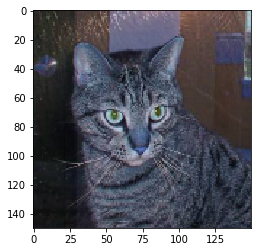

In [16]:
img_array = cv2.imread(r'C:\Users\box88\Desktop\ai\test\1.jpg') 
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()